# Preprocessing Data

In [1]:
import yaml
import matplotlib.pyplot as plt
from preprocessing import preprocessed_books_data, preprocessed_books_rating

In [2]:
cfg = yaml.safe_load(open("config.yaml"))

## Books Rating

In [3]:
books_rating = preprocessed_books_rating(cfg)

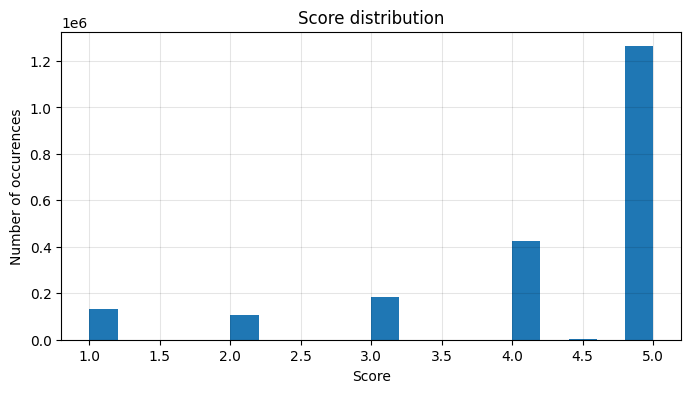

In [4]:
books_rating['score'].hist(bins=20, figsize=(8, 4))
plt.grid(c='k', alpha=0.1)
plt.title('Score distribution')
plt.xlabel('Score')
plt.ylabel('Number of occurences')
plt.show()

In [5]:
books_rating.query('title == "Out of the Dust" and user_id == "A2EEAHFEIX0MP6"')

,title,user_id,score,time,summary,text
1096027,Out of the Dust,A2EEAHFEIX0MP6,3.5,979257600,Out of the Dust. Out of the Dust,"""The rain has brought back some grass and the ..."


In [6]:
books_rating.query('title.str.startswith("Glacier pilot;: The story of Bob Reeve and the") and user_id == "A2L7N2U5Z316ZE"')

,title,user_id,score,time,summary,text
590447,Glacier pilot;: The story of Bob Reeve and the...,A2L7N2U5Z316ZE,5.0,1248048000,Bush Pilot Supreme. Flying in a Wilderness,"""...the rousing story of Bob Reeve, Alaska's f..."


## Books Data

In [7]:
books_data = preprocessed_books_data(cfg)

In [8]:
books_data

,title,description,authors,categories
0,Its Only Art If Its Well Hung!,,Julie Strain,Comics & Graphic Novels
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,Philip Nel,Biography & Autobiography
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,David R. Ray,Religion
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,Veronica Haddon,Fiction
4,"Nation Dance: Religion, Identity and Cultural ...",,Edward Long,NaN
...,...,...,...,...
212400,Red Boots for Christmas,Everyone in the village of Friedensdorf is hap...,NaN,Juvenile Fiction
212401,Mamaw,"Give your Mamaw a useful, beautiful and though...",Wild Wild Cabbage,NaN
212402,The Autograph Man,Alex-Li Tandem sells autographs. His business ...,Zadie Smith,Fiction
212403,Student's Solutions Manual for Johnson/Mowry's...,Discover the many ways mathematics is relevant...,David B. Johnson,NaN
